# Required Packages, Modules and Utilities

In [1]:
# Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, RocCurveDisplay

%matplotlib inline
import warnings
warnings.simplefilter("ignore")

# Data Extraction

In [2]:
filename = "malware_detection_dataset.csv"

# Import csv file to DataFrame format
malware_data = pd.read_csv(filename)

In [3]:
# Show first five rows
malware_data.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.2.101-10.42.0.151-443-59096-6,10.42.0.151,59096,172.217.2.101,443,6,18/06/2017 10:59:10,22213,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,10.42.0.151-31.13.71.3-60237-443-6,10.42.0.151,60237,31.13.71.3,443,6,18/06/2017 10:59:10,298571,6,7,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,172.217.0.234-10.42.0.151-443-37091-6,10.42.0.151,37091,172.217.0.234,443,6,18/06/2017 10:59:26,22294,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,10.42.0.151-54.85.219.72-48597-443-6,54.85.219.72,443,10.42.0.151,48597,6,18/06/2017 10:59:23,3959745,1,3,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,10.42.0.151-74.6.105.9-37494-443-6,10.42.0.151,37494,74.6.105.9,443,6,18/06/2017 10:59:33,340394,10,9,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


# Data Cleaning

In [4]:
# Removal of leading and trailing whitespaces from column headings
# Replacement of spaces between words in column headings with underscore(s)
malware_data.columns = [column.strip().replace(' ', '_') for column in list(malware_data.columns)]

# Drop irrelevant columns
malware_data.drop(labels=['Flow_ID', 'Timestamp'], axis=1, inplace=True)
malware_data.columns

Index(['Source_IP', 'Source_Port', 'Destination_IP', 'Destination_Port',
       'Protocol', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes/s', 'Flow_Packets/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std'

In [5]:
# Get columns with only one unique value
single_valued_columns = []

for col in malware_data.columns:
    if malware_data[col].nunique() == 1:
        single_valued_columns.append(col)
        print(col, malware_data[col].nunique())

print('\n')
print('There are ', str(len(single_valued_columns)), 'single-valued columns: ')
print(single_valued_columns)
print('\n')

# Remove single-valued columns
malware_data.drop(labels=single_valued_columns, axis=1,  inplace=True)
malware_data.columns

Bwd_PSH_Flags 1
Fwd_URG_Flags 1
Bwd_URG_Flags 1
RST_Flag_Count 1
CWE_Flag_Count 1
ECE_Flag_Count 1
Fwd_Avg_Bytes/Bulk 1
Fwd_Avg_Packets/Bulk 1
Fwd_Avg_Bulk_Rate 1
Bwd_Avg_Bytes/Bulk 1
Bwd_Avg_Packets/Bulk 1
Bwd_Avg_Bulk_Rate 1


There are  12 single-valued columns: 
['Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'RST_Flag_Count', 'CWE_Flag_Count', 'ECE_Flag_Count', 'Fwd_Avg_Bytes/Bulk', 'Fwd_Avg_Packets/Bulk', 'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes/Bulk', 'Bwd_Avg_Packets/Bulk', 'Bwd_Avg_Bulk_Rate']




Index(['Source_IP', 'Source_Port', 'Destination_IP', 'Destination_Port',
       'Protocol', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes/s', 'Flow_Packets/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_

# Exploratory Data Analysis

In [6]:
# Get number of rows and columns
malware_data.shape

(24729, 71)

## Datatype and Range of Values of Columns

In [7]:
# Show the names and datatypes of columns
malware_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24729 entries, 0 to 24728
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Source_IP                    24729 non-null  object 
 1   Source_Port                  24729 non-null  int64  
 2   Destination_IP               24729 non-null  object 
 3   Destination_Port             24729 non-null  int64  
 4   Protocol                     24729 non-null  int64  
 5   Flow_Duration                24729 non-null  int64  
 6   Total_Fwd_Packets            24729 non-null  int64  
 7   Total_Backward_Packets       24729 non-null  int64  
 8   Total_Length_of_Fwd_Packets  24729 non-null  int64  
 9   Total_Length_of_Bwd_Packets  24729 non-null  float64
 10  Fwd_Packet_Length_Max        24729 non-null  int64  
 11  Fwd_Packet_Length_Min        24729 non-null  int64  
 12  Fwd_Packet_Length_Mean       24729 non-null  float64
 13  Fwd_Packet_Lengt

In [8]:
# Shows the mean, standard deviation, percentiles, minimum and maximum values of numerical data (datatype - float & int)
malware_data.describe()

,Source_Port,Destination_Port,Protocol,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,...,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,24729.000000,24729.000000,24729.000000,2.472900e+04,24729.000000,24729.000000,24729.000000,2.472900e+04,24729.000000,24729.000000,...,24729.000000,24729.000000,2.472900e+04,2.472900e+04,2.472900e+04,2.472900e+04,2.472900e+04,2.472900e+04,2.472900e+04,2.472900e+04
mean,38955.703951,5745.717942,8.293259,1.028840e+07,7.079097,9.296696,533.442962,9.900713e+03,210.051882,13.375066,...,1.203445,26.035100,1.502524e+05,2.501288e+04,1.728327e+05,1.318831e+05,3.723105e+06,2.819067e+05,3.964729e+06,3.509475e+06
std,18444.543420,15279.998418,4.514433,2.035457e+07,43.742094,110.080672,2401.576846,1.567220e+05,423.991591,72.145208,...,4.998793,6.720128,8.671138e+05,3.640135e+05,1.017055e+06,8.128204e+05,1.389364e+07,2.779641e+06,1.455277e+07,1.359477e+07
min,0.000000,0.000000,0.000000,2.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,34152.000000,80.000000,6.000000,5.105800e+04,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,44342.000000,80.000000,6.000000,5.518570e+05,2.000000,1.000000,31.000000,0.000000e+00,30.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,52363.000000,443.000000,6.000000,1.055015e+07,4.000000,3.000000,368.000000,2.220000e+02,244.000000,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65481.000000,62155.000000,17.000000,1.199943e+08,2326.000000,6939.000000,207598.000000,1.010000e+07,13680.000000,1460.000000,...,231.000000,60.000000,2.610000e+07,3.210000e+07,4.880000e+07,2.020000e+07,1.190000e+08,5.920000e+07,1.190000e+08,1.190000e+08


In [9]:
# Show the number of unique values for each column
for col in malware_data.columns:
        print(col, malware_data[col].nunique())

Source_IP 539
Source_Port 11451
Destination_IP 983
Destination_Port 2587
Protocol 3
Flow_Duration 22692
Total_Fwd_Packets 228
Total_Backward_Packets 276
Total_Length_of_Fwd_Packets 2527
Total_Length_of_Bwd_Packets 3707
Fwd_Packet_Length_Max 1060
Fwd_Packet_Length_Min 79
Fwd_Packet_Length_Mean 3935
Fwd_Packet_Length_Std 4323
Bwd_Packet_Length_Max 674
Bwd_Packet_Length_Min 276
Bwd_Packet_Length_Mean 4055
Bwd_Packet_Length_Std 4081
Flow_Bytes/s 13182
Flow_Packets/s 22825
Flow_IAT_Mean 20991
Flow_IAT_Std 9671
Flow_IAT_Max 16842
Flow_IAT_Min 13876
Fwd_IAT_Total 11013
Fwd_IAT_Mean 13663
Fwd_IAT_Std 8973
Fwd_IAT_Max 11273
Fwd_IAT_Min 8974
Bwd_IAT_Total 5608
Bwd_IAT_Mean 7489
Bwd_IAT_Std 6145
Bwd_IAT_Max 5905
Bwd_IAT_Min 2232
Fwd_PSH_Flags 2
Fwd_Header_Length 588
Bwd_Header_Length 582
Fwd_Packets/s 22856
Bwd_Packets/s 16809
Min_Packet_Length 50
Max_Packet_Length 907
Packet_Length_Mean 5239
Packet_Length_Std 5439
Packet_Length_Variance 5439
FIN_Flag_Count 2
SYN_Flag_Count 2
PSH_Flag_Count 2
ACK

In [10]:
# Label ranges
malware_data['Label'].value_counts()

SCAREWARE_ANDROIDSPY      5815
RANSOMWARE_WANNALOCKER    5292
BENIGN                    4969
ADWARE_GOOLIGAN           4462
SMSMALWARE_SMSSNIFFER     4191
Name: Label, dtype: int64

In [11]:
# Assign labels to a list
malware_labels = list(malware_data['Label'].unique())
malware_labels.remove('BENIGN')

# Show source ports with the maximum number of malware types
lab_source = malware_data.groupby(['Label', 'Source_Port']).agg({'Source_Port': 'count'})
lab_source.columns = ['Number']

for label in malware_labels:
    print(label)
    print(lab_source.loc[label, :].sort_values('Number', ascending=False)[:2], '\n\n')

ADWARE_GOOLIGAN
             Number
Source_Port        
443             216
80              171 


RANSOMWARE_WANNALOCKER
             Number
Source_Port        
80              302
443             238 


SCAREWARE_ANDROIDSPY
             Number
Source_Port        
80              460
443             266 


SMSMALWARE_SMSSNIFFER
             Number
Source_Port        
443             251
80              224 




In [12]:
# Show destination ports with the maximum number of malware types
lab_destination = malware_data.groupby(['Label', 'Destination_Port']).agg({'Destination_Port': 'count'})
lab_destination.columns = ['Number']

for label in malware_labels:
    print(label)
    print(lab_destination.loc[label, :].sort_values('Number', ascending=False)[:2], '\n\n')

ADWARE_GOOLIGAN
                  Number
Destination_Port        
443                 1669
80                  1407 


RANSOMWARE_WANNALOCKER
                  Number
Destination_Port        
443                 2127
80                  1487 


SCAREWARE_ANDROIDSPY
                  Number
Destination_Port        
80                  2006
443                 1758 


SMSMALWARE_SMSSNIFFER
                  Number
Destination_Port        
443                 1795
80                   973 




## Visualizations

Protocol  Protocol_Name         
0         IPv6 Hop-by-Hop Option      100
17        UDP                        5210
6         TCP                       19419
dtype: int64


<Axes: xlabel='Protocol_Name', ylabel='count'>

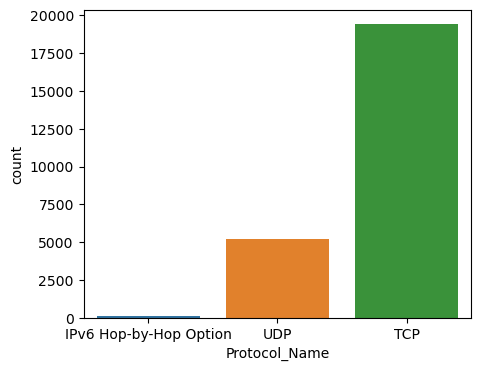

In [13]:
# Mapping of protocol numbers to corresponding names
protocol_name = malware_data['Protocol'].map(lambda a: 'IPv6 Hop-by-Hop Option' if a == 0 else 'TCP' if a == 6 else 'UDP')
malware_data['Protocol_Name'] = protocol_name

# Show protocol counts
print(malware_data[['Protocol', 'Protocol_Name']].value_counts().sort_values())

plt.figure(figsize=(5,4))
sns.countplot(data=malware_data, x='Protocol_Name', order=['IPv6 Hop-by-Hop Option', 'UDP', 'TCP'])

Protocol_Name           Label                 
IPv6 Hop-by-Hop Option  SCAREWARE_ANDROIDSPY        24
                        ADWARE_GOOLIGAN             23
                        RANSOMWARE_WANNALOCKER      20
                        SMSMALWARE_SMSSNIFFER       20
                        BENIGN                      13
TCP                     SCAREWARE_ANDROIDSPY      4467
                        RANSOMWARE_WANNALOCKER    4151
                        BENIGN                    4103
                        ADWARE_GOOLIGAN           3439
                        SMSMALWARE_SMSSNIFFER     3259
UDP                     SCAREWARE_ANDROIDSPY      1324
                        RANSOMWARE_WANNALOCKER    1121
                        ADWARE_GOOLIGAN           1000
                        SMSMALWARE_SMSSNIFFER      912
                        BENIGN                     853
Name: Label, dtype: int64


<Axes: xlabel='Protocol_Name', ylabel='count'>

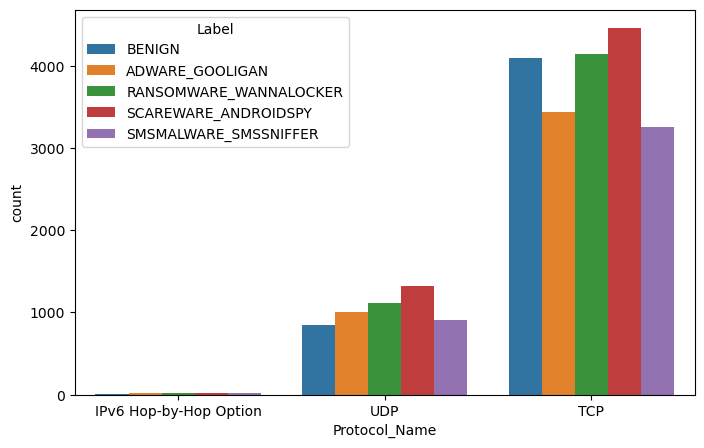

In [14]:
# Categorize labels by protocols
print(malware_data.groupby('Protocol_Name')['Label'].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(data=malware_data, x='Protocol_Name', hue='Label', order=['IPv6 Hop-by-Hop Option', 'UDP', 'TCP'])

Protocol_Name
IPv6 Hop-by-Hop Option    9.291741e+07
TCP                       1.234745e+07
UDP                       1.027834e+06
Name: Flow_Duration, dtype: float64


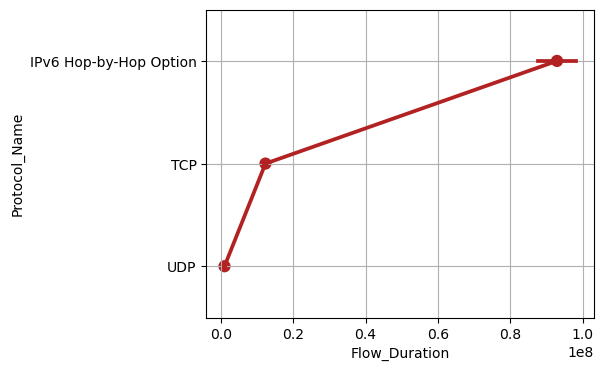

In [15]:
# Show mean Flow_Duration for each protocol for comparison
# Error bar shows 95% confidence interval

print(malware_data.groupby('Protocol_Name')['Flow_Duration'].mean())

plt.figure(figsize=(5, 4))
sns.pointplot(data=malware_data, y='Protocol_Name', x='Flow_Duration',
              order=['IPv6 Hop-by-Hop Option', 'TCP', 'UDP'], color='firebrick')
plt.grid()
plt.show()

Label
BENIGN                     42607.342303
SMSMALWARE_SMSSNIFFER      56981.275282
SCAREWARE_ANDROIDSPY       70308.946147
RANSOMWARE_WANNALOCKER     70558.103660
ADWARE_GOOLIGAN           150183.160358
Name: Flow_Bytes/s, dtype: float64


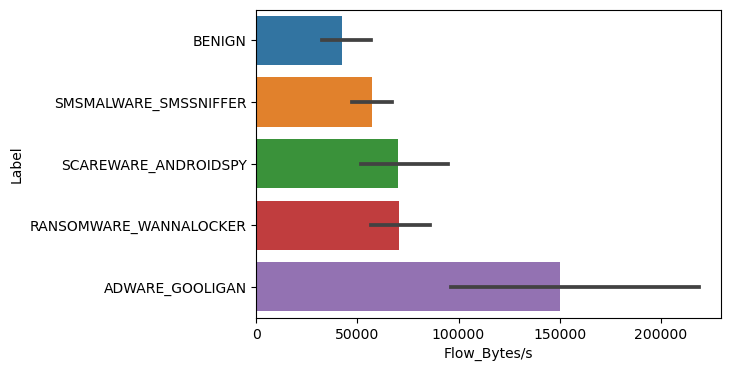

In [16]:
# Displays mean of Flow_Bytes/s per label.
# Lines show 95% confidence intervals for the mean
label_flowbyte = malware_data.groupby('Label')['Flow_Bytes/s'].mean().sort_values()
print(label_flowbyte)

plt.figure(figsize=(6,4))
sns.barplot(data=malware_data, x='Flow_Bytes/s', y='Label', order=label_flowbyte.index)

plt.show()

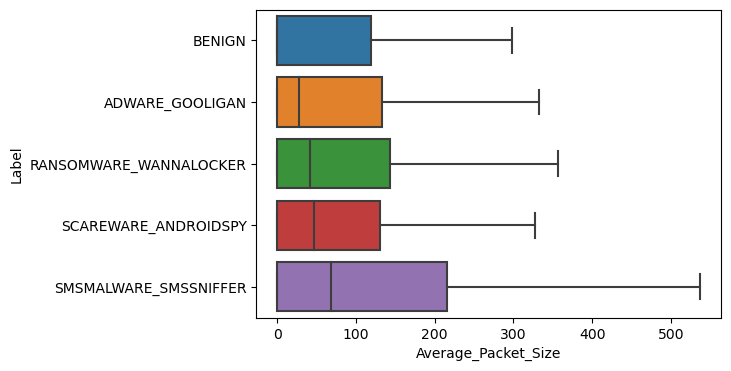

In [17]:
# Show the distribution of the average packet size with respect to the labels
plt.figure(figsize=(6,4))
sns.boxplot(data=malware_data, x='Average_Packet_Size', y='Label', sym="")

plt.show()

# Feature Engineering
### to select and transfrom relevant features

### Data Transformation for Binary Classification:
-  BENIGN = 0
-  Others = 1

In [18]:
# Mapping of BENIGN to 0, and others to 1
label_binary = malware_data['Label'].map(lambda a: 0 if a == 'BENIGN' else 1)
malware_data['Label_Binary'] = label_binary

print(malware_data['Label_Binary'].value_counts())
malware_data.head()

1    19760
0     4969
Name: Label_Binary, dtype: int64


,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Protocol_Name,Label_Binary
0,10.42.0.151,59096,172.217.2.101,443,6,22213,1,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0
1,10.42.0.151,60237,31.13.71.3,443,6,298571,6,7,1080,201.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0
2,10.42.0.151,37091,172.217.0.234,443,6,22294,1,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0
3,54.85.219.72,443,10.42.0.151,48597,6,3959745,1,3,31,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0
4,10.42.0.151,37494,74.6.105.9,443,6,340394,10,9,1445,5603.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0


Malware    19760
BENIGN      4969
Name: Label_Binary, dtype: int64


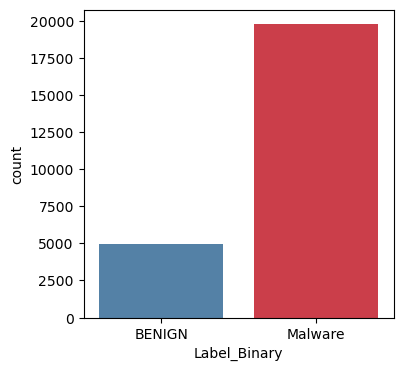

In [19]:
# Show Binary Classification Labels
bin_labels_count = malware_data['Label_Binary'].value_counts()
bin_labels_count.index = ['Malware', 'BENIGN']
print(bin_labels_count)

plt.figure(figsize=(4, 4))
sns.countplot(data=malware_data, x='Label_Binary', palette=['#4682b4', '#e32636'])
plt.xticks([0, 1], ['BENIGN', 'Malware'])
plt.show()

### Data Transformation for Multi-class Classification:
-  BENIGN = 0
-  ADWARE_GOOLIGAN = 1
-  RANSOMWARE_WANNALOCKER = 2
-  SCAREWARE_ANDROIDSPY = 3
-  SMSMALWARE_SMSSNIFFER = 4

In [20]:
# Mapping of all labels to unique numbers
def map_label(label):
    if label == 'ADWARE_GOOLIGAN':
        label_type = 1
    elif label == 'RANSOMWARE_WANNALOCKER':
        label_type = 2
    elif label == 'SCAREWARE_ANDROIDSPY':
        label_type = 3
    elif label == 'SMSMALWARE_SMSSNIFFER':
        label_type = 4
    else:
        label_type = 0

    return label_type

malware_data['Label_Multiple'] = malware_data['Label'].apply(map_label)

print(malware_data['Label_Multiple'].value_counts())
malware_data.head()

3    5815
2    5292
0    4969
1    4462
4    4191
Name: Label_Multiple, dtype: int64


,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Protocol_Name,Label_Binary,Label_Multiple
0,10.42.0.151,59096,172.217.2.101,443,6,22213,1,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0,0
1,10.42.0.151,60237,31.13.71.3,443,6,298571,6,7,1080,201.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0,0
2,10.42.0.151,37091,172.217.0.234,443,6,22294,1,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0,0
3,54.85.219.72,443,10.42.0.151,48597,6,3959745,1,3,31,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0,0
4,10.42.0.151,37494,74.6.105.9,443,6,340394,10,9,1445,5603.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0,0


SCAREWARE_ANDROIDSPY      5815
RANSOMWARE_WANNALOCKER    5292
BENIGN                    4969
ADWARE_GOOLIGAN           4462
SMSMALWARE_SMSSNIFFER     4191
Name: Label, dtype: int64


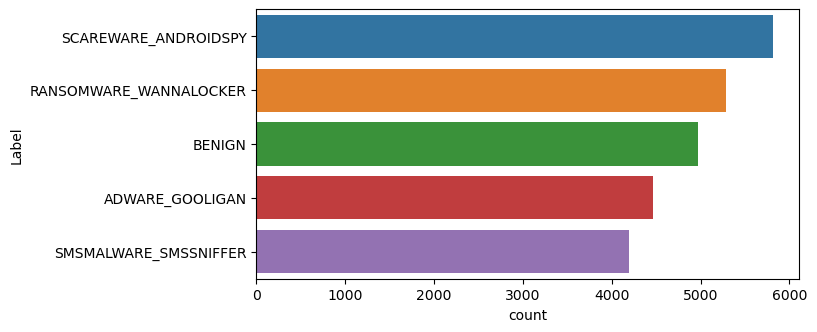

In [21]:
# Show Multi-class Classification Labels
print(malware_data['Label'].value_counts())

plt.figure(figsize=(7, 3.5))
sns.countplot(data=malware_data, y='Label', order=malware_data['Label'].value_counts().index)
plt.show()

### Encoding Categorical Features

In [22]:
# Encode categorical features
cat_features = ['Source_IP', 'Destination_IP']
non_numeric_data = malware_data[cat_features]
label_encoder = LabelEncoder()

for col in cat_features:
    non_numeric_data[col] = label_encoder.fit_transform(non_numeric_data[col])

print(non_numeric_data.iloc[:2])

   Source_IP  Destination_IP
0          2             322
1          2             655


In [23]:
# Drop target and categorical columns to get only numeric features
numeric_features = list(malware_data.columns.drop(['Source_IP', 'Destination_IP', 'Protocol_Name',
                                                   'Label', 'Label_Binary', 'Label_Multiple']))

In [24]:
# Combine relevant features to get training data
X = non_numeric_data.join(malware_data[numeric_features])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24729 entries, 0 to 24728
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Source_IP                    24729 non-null  int32  
 1   Destination_IP               24729 non-null  int32  
 2   Source_Port                  24729 non-null  int64  
 3   Destination_Port             24729 non-null  int64  
 4   Protocol                     24729 non-null  int64  
 5   Flow_Duration                24729 non-null  int64  
 6   Total_Fwd_Packets            24729 non-null  int64  
 7   Total_Backward_Packets       24729 non-null  int64  
 8   Total_Length_of_Fwd_Packets  24729 non-null  int64  
 9   Total_Length_of_Bwd_Packets  24729 non-null  float64
 10  Fwd_Packet_Length_Max        24729 non-null  int64  
 11  Fwd_Packet_Length_Min        24729 non-null  int64  
 12  Fwd_Packet_Length_Mean       24729 non-null  float64
 13  Fwd_Packet_Lengt

# Model Fitting and Evaluation

In [25]:
# Set seed for reproducibility
SEED = 21

# Instantiate models
models = [DecisionTreeClassifier(random_state=SEED),
          RandomForestClassifier(random_state=SEED),
          KNeighborsClassifier(),
          LogisticRegression(random_state=SEED, max_iter=300),
          LinearSVC(random_state=SEED)]

## Binary Classification

In [26]:
bin_y = malware_data['Label_Binary'].values

# Split data into 70% training set and 30% test set
# X: features; y: targets
bin_X_train, bin_X_test, bin_y_train, bin_y_test = train_test_split(X, bin_y, test_size=0.3, random_state=SEED)


The Metrics for DecisionTreeClassifier are: 

Accuracy: 0.879
Precision: 0.929
Recall: 0.918
F1_Score: 0.924
Specificity: 0.721
AUC_ROC: 0.82 


              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1493
           1       0.93      0.92      0.92      5926

    accuracy                           0.88      7419
   macro avg       0.81      0.82      0.81      7419
weighted avg       0.88      0.88      0.88      7419

[[1077  416]
 [ 484 5442]]


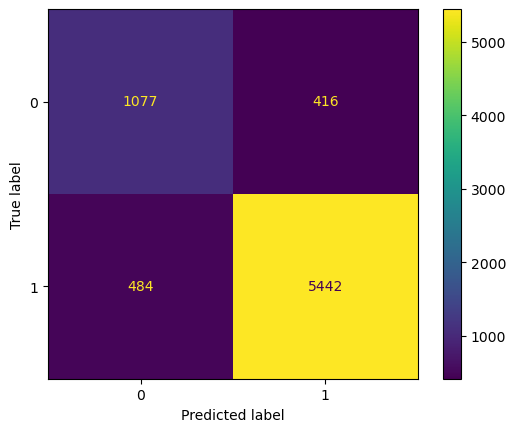

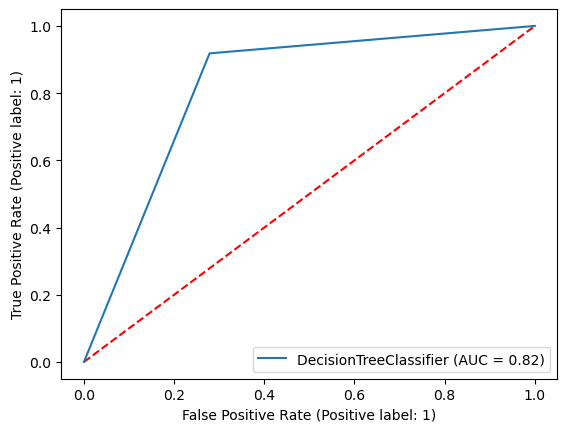


The Metrics for RandomForestClassifier are: 

Accuracy: 0.87
Precision: 0.878
Recall: 0.971
F1_Score: 0.922
Specificity: 0.465
AUC_ROC: 0.718 


              precision    recall  f1-score   support

           0       0.80      0.46      0.59      1493
           1       0.88      0.97      0.92      5926

    accuracy                           0.87      7419
   macro avg       0.84      0.72      0.76      7419
weighted avg       0.86      0.87      0.86      7419

[[ 694  799]
 [ 169 5757]]


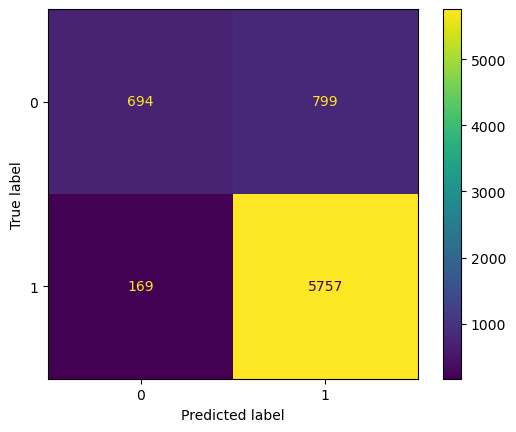

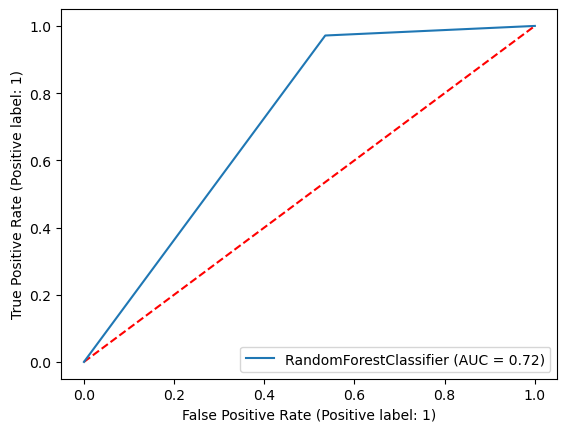


The Metrics for KNeighborsClassifier are: 

Accuracy: 0.802
Precision: 0.837
Recall: 0.933
F1_Score: 0.883
Specificity: 0.281
AUC_ROC: 0.607 


              precision    recall  f1-score   support

           0       0.51      0.28      0.36      1493
           1       0.84      0.93      0.88      5926

    accuracy                           0.80      7419
   macro avg       0.68      0.61      0.62      7419
weighted avg       0.77      0.80      0.78      7419

[[ 419 1074]
 [ 397 5529]]


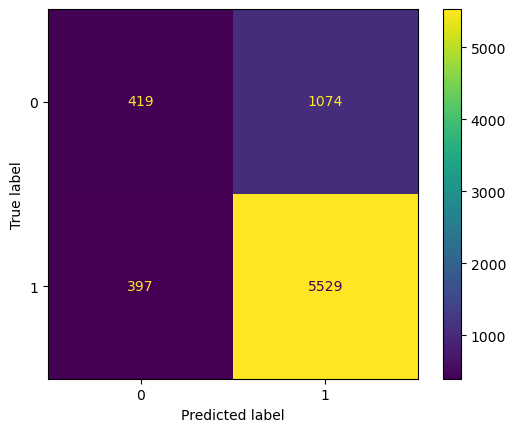

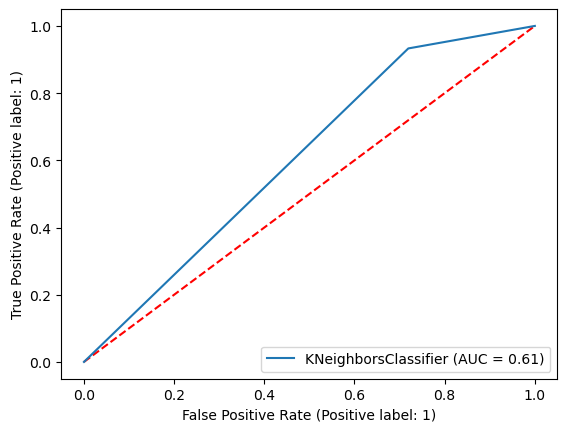


The Metrics for LogisticRegression are: 

Accuracy: 0.797
Precision: 0.799
Recall: 0.996
F1_Score: 0.887
Specificity: 0.007
AUC_ROC: 0.502 


              precision    recall  f1-score   support

           0       0.32      0.01      0.01      1493
           1       0.80      1.00      0.89      5926

    accuracy                           0.80      7419
   macro avg       0.56      0.50      0.45      7419
weighted avg       0.70      0.80      0.71      7419

[[  10 1483]
 [  21 5905]]


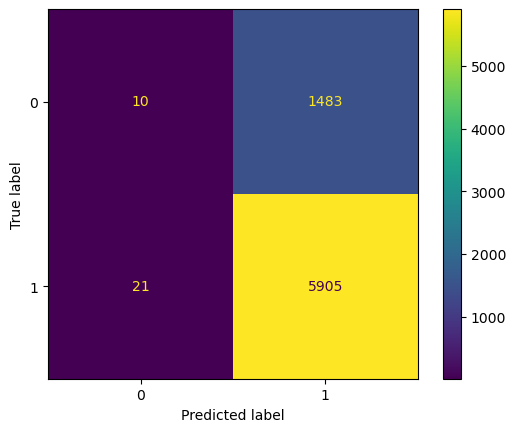

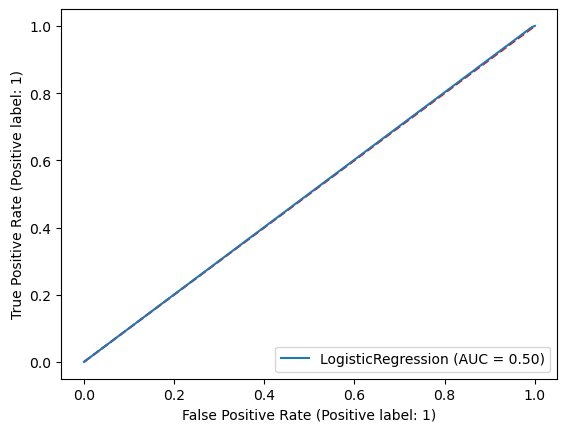


The Metrics for LinearSVC are: 

Accuracy: 0.738
Precision: 0.795
Recall: 0.905
F1_Score: 0.846
Specificity: 0.073
AUC_ROC: 0.489 


              precision    recall  f1-score   support

           0       0.16      0.07      0.10      1493
           1       0.79      0.90      0.85      5926

    accuracy                           0.74      7419
   macro avg       0.48      0.49      0.47      7419
weighted avg       0.67      0.74      0.70      7419

[[ 109 1384]
 [ 563 5363]]


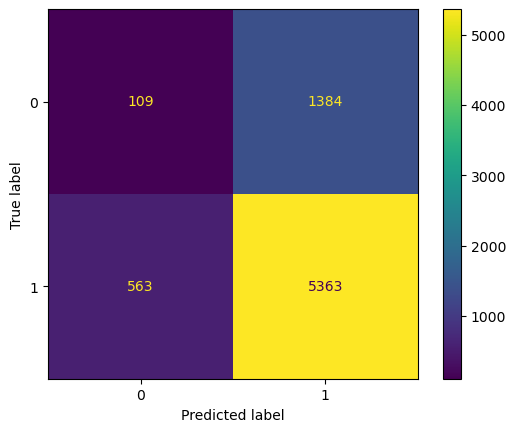

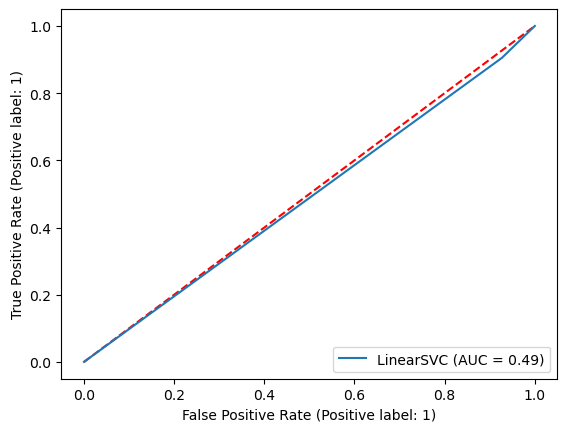

In [27]:
# Lists for evaluation metrics
bin_model = []
bin_accuracy = []
bin_precision = []
bin_recall = []          # Recall = Sensitivity = TPR
bin_f1 =[]
bin_specificity = []     # Specificity = TNR
bin_auc_roc =[]

for model in models:
    model_name = model.__class__.__name__

    model.fit(bin_X_train, bin_y_train)               # train the algorithm on the training data
    model_pred = model.predict(bin_X_test)            # predict labels

    cm = confusion_matrix(bin_y_test, model_pred, labels=model.classes_)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Mapping of scorer name to scorer function
    # Round up values to 3 decimal places
    accuracy = round(metrics.accuracy_score(bin_y_test, model_pred), 3)
    precision = round(metrics.precision_score(bin_y_test, model_pred), 3)
    recall = round(metrics.recall_score(bin_y_test, model_pred), 3)
    f1_score = round(metrics.f1_score(bin_y_test, model_pred), 3)
    specificity = round(cm[0,0]/(cm[0,0]+cm[0,1]), 3)
    roc_auc = round(roc_auc_score(bin_y_test, model_pred), 3)

    # Append results to corresponding lists
    bin_model.append(model_name)
    bin_accuracy.append(accuracy)
    bin_precision.append(precision)
    bin_recall.append(recall)
    bin_f1.append(f1_score)
    bin_specificity.append(specificity)
    bin_auc_roc.append(roc_auc)

    print("\nThe Metrics for {} are: ".format(model_name))

    print('\nAccuracy: {}'.format(accuracy))
    print('Precision: {}'.format(precision))
    print('Recall: {}'.format(recall))
    print('F1_Score: {}'.format(f1_score))
    print('Specificity: {}'.format(specificity))
    print('AUC_ROC: {} \n\n'.format(roc_auc))

    print(classification_report(bin_y_test, model_pred))
    print(cm)
    cm_display.plot()
    plt.show()

    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], 'r--')
    RocCurveDisplay.from_predictions(bin_y_test, model_pred, name=str(model_name), ax=ax)
    plt.show()

    print("==========================================================================================================")

### Compilation of Binary Classification Results

In [28]:
# Show lists of results

print("Models: ", bin_model)
print("Accuracy: ", bin_accuracy)
print("Precision: ", bin_precision)
print("TPR: ", bin_recall)
print("F1_Score: ", bin_f1)
print("TNR: ", bin_specificity)
print("AUC_ROC: ", bin_auc_roc)

Models:  ['DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'LinearSVC']
Accuracy:  [0.879, 0.87, 0.802, 0.797, 0.738]
Precision:  [0.929, 0.878, 0.837, 0.799, 0.795]
TPR:  [0.918, 0.971, 0.933, 0.996, 0.905]
F1_Score:  [0.924, 0.922, 0.883, 0.887, 0.846]
TNR:  [0.721, 0.465, 0.281, 0.007, 0.073]
AUC_ROC:  [0.82, 0.718, 0.607, 0.502, 0.489]


In [29]:
# Convert lists to a single DataFrame
bin_dict_of_lists = {
    "Bin_Model": bin_model,
    "Bin_Accuracy": bin_accuracy,
    "Bin_Precision": bin_precision,
    "Bin_F1_Score": bin_f1,
    "Bin_TPR": bin_recall,
    "Bin_TNR": bin_specificity,
    "Bin_AUC_ROC": bin_auc_roc
}

bin_all_results = pd.DataFrame(bin_dict_of_lists)
bin_all_results

,Bin_Model,Bin_Accuracy,Bin_Precision,Bin_F1_Score,Bin_TPR,Bin_TNR,Bin_AUC_ROC
0,DecisionTreeClassifier,0.879,0.929,0.924,0.918,0.721,0.820
1,RandomForestClassifier,0.870,0.878,0.922,0.971,0.465,0.718
2,KNeighborsClassifier,0.802,0.837,0.883,0.933,0.281,0.607
3,LogisticRegression,0.797,0.799,0.887,0.996,0.007,0.502
4,LinearSVC,0.738,0.795,0.846,0.905,0.073,0.489


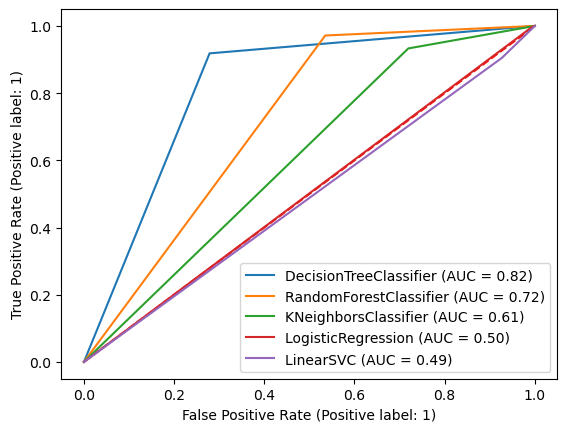

In [30]:
# Show all ROC_AUC curves in one chart

ax = plt.gca()
ax.plot([0, 1], [0, 1], 'r--')

for model in models:
    model_name = model.__class__.__name__

    model.fit(bin_X_train, bin_y_train)
    model_pred = model.predict(bin_X_test)

    RocCurveDisplay.from_predictions(bin_y_test, model_pred, name=str(model_name), ax=ax)

plt.show()

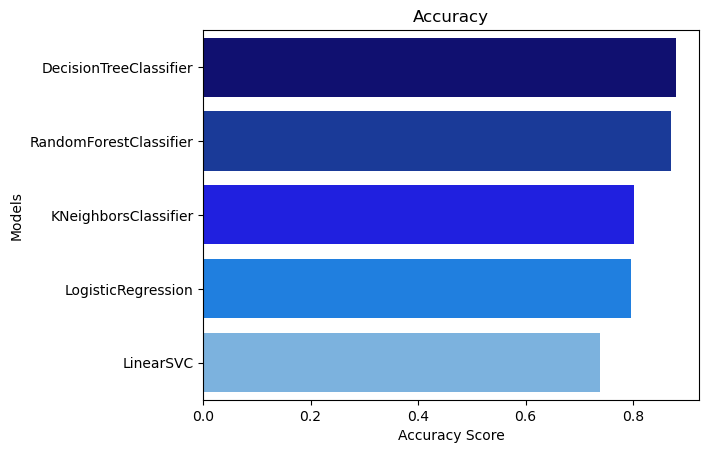

In [31]:
# Display accuracies
custom_palette1 = ["#000080", "#0530ad", "#0000FF", "#007FFF", "#6CB4EE"]

sns.barplot(data=bin_all_results, x='Bin_Accuracy', y='Bin_Model', palette=custom_palette1)
plt.title("Accuracy")
plt.xlabel("Accuracy Score")
plt.ylabel("Models")
plt.show()

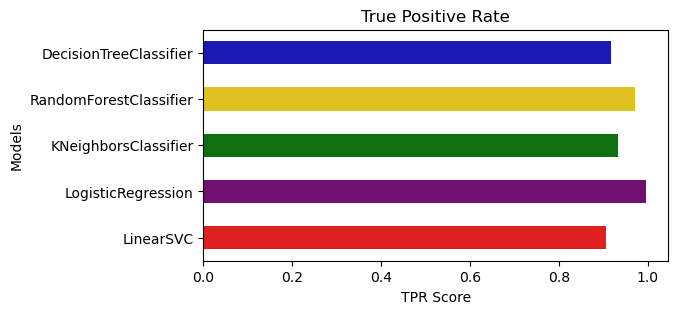

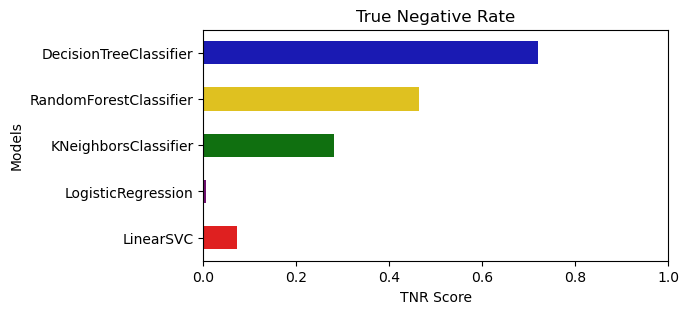

In [32]:
# Show TPR & TNR of all models
custom_palette2 = ["mediumblue", "gold", "green", "purple", "red"]

plt.figure(figsize=(6,3))
sns.barplot(data=bin_all_results, x='Bin_TPR', y='Bin_Model', width=0.5, palette=custom_palette2)
plt.title("True Positive Rate")
plt.xlabel("TPR Score")
plt.ylabel("Models")
plt.show()

plt.figure(figsize=(6,3))
sns.barplot(data=bin_all_results, x='Bin_TNR', y='Bin_Model', width=0.5, palette=custom_palette2)
plt.title("True Negative Rate")
plt.xlabel("TNR Score")
plt.ylabel("Models")
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()

## Multi-class Classification

In [33]:
multi_y = malware_data['Label_Multiple'].values

# Split data into 70% training set and 30% test set
# X: features; y: targets
multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(X, multi_y, test_size=0.3,
                                                                            random_state=SEED)


The Metrics for DecisionTreeClassifier are: 

Accuracy: 0.754 

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1493
           1       0.69      0.66      0.68      1374
           2       0.71      0.71      0.71      1609
           3       0.70      0.71      0.70      1710
           4       1.00      0.99      0.99      1233

    accuracy                           0.75      7419
   macro avg       0.76      0.76      0.76      7419
weighted avg       0.75      0.75      0.75      7419

[[1100  102  132  159    0]
 [ 120  910  163  181    0]
 [ 139  143 1146  179    2]
 [ 146  161  184 1215    4]
 [   0    3    0    4 1226]]


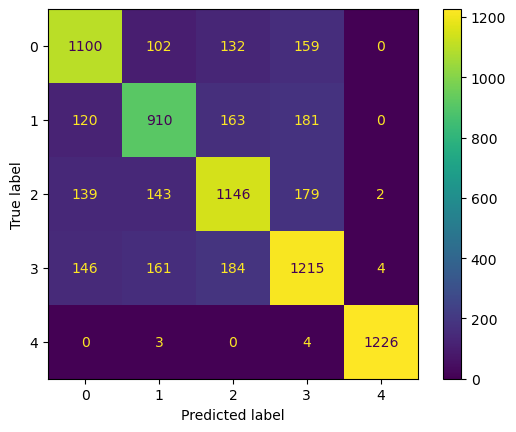


The Metrics for RandomForestClassifier are: 

Accuracy: 0.655 

              precision    recall  f1-score   support

           0       0.60      0.60      0.60      1493
           1       0.58      0.49      0.53      1374
           2       0.61      0.64      0.63      1609
           3       0.56      0.60      0.58      1710
           4       1.00      0.99      1.00      1233

    accuracy                           0.65      7419
   macro avg       0.67      0.67      0.67      7419
weighted avg       0.65      0.65      0.65      7419

[[ 896  131  197  269    0]
 [ 186  676  211  301    0]
 [ 166  165 1034  240    4]
 [ 241  201  243 1024    1]
 [   0    1    1    5 1226]]


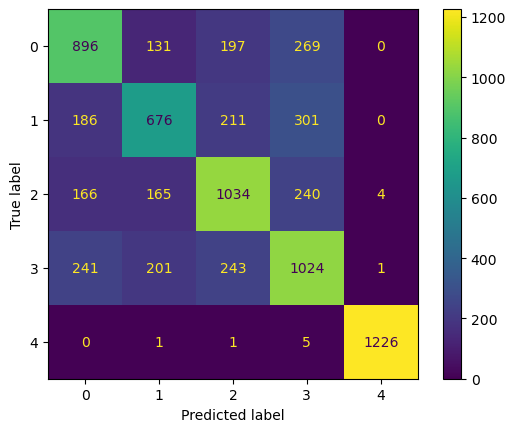


The Metrics for KNeighborsClassifier are: 

Accuracy: 0.394 

              precision    recall  f1-score   support

           0       0.38      0.47      0.42      1493
           1       0.34      0.33      0.34      1374
           2       0.39      0.41      0.40      1609
           3       0.39      0.34      0.36      1710
           4       0.51      0.43      0.47      1233

    accuracy                           0.39      7419
   macro avg       0.40      0.40      0.40      7419
weighted avg       0.40      0.39      0.39      7419

[[695 192 253 248 105]
 [271 460 252 257 134]
 [311 252 655 250 141]
 [375 292 333 585 125]
 [177 167 191 171 527]]


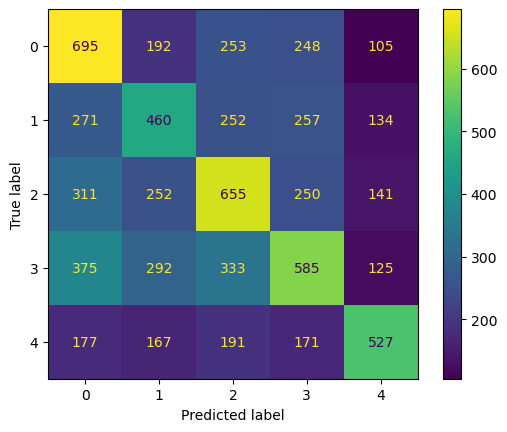


The Metrics for LogisticRegression are: 

Accuracy: 0.244 

              precision    recall  f1-score   support

           0       0.30      0.14      0.19      1493
           1       0.27      0.01      0.02      1374
           2       0.24      0.19      0.21      1609
           3       0.24      0.71      0.35      1710
           4       0.30      0.06      0.10      1233

    accuracy                           0.24      7419
   macro avg       0.27      0.22      0.17      7419
weighted avg       0.26      0.24      0.19      7419

[[ 206    4  205 1054   24]
 [ 126   11  239  954   44]
 [ 159   11  309 1069   61]
 [ 145    7  297 1207   54]
 [  62    8  238  848   77]]


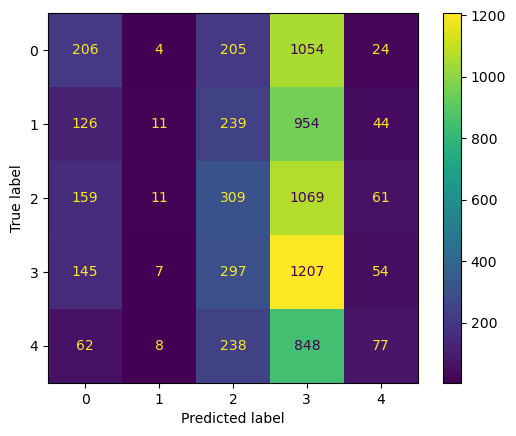


The Metrics for LinearSVC are: 

Accuracy: 0.196 

              precision    recall  f1-score   support

           0       0.17      0.10      0.13      1493
           1       0.19      0.46      0.27      1374
           2       0.21      0.23      0.22      1609
           3       0.27      0.06      0.10      1710
           4       0.17      0.15      0.16      1233

    accuracy                           0.20      7419
   macro avg       0.20      0.20      0.18      7419
weighted avg       0.21      0.20      0.17      7419

[[151 658 399  68 217]
 [166 635 297  72 204]
 [188 732 373  78 238]
 [183 739 426 107 255]
 [198 501 273  76 185]]


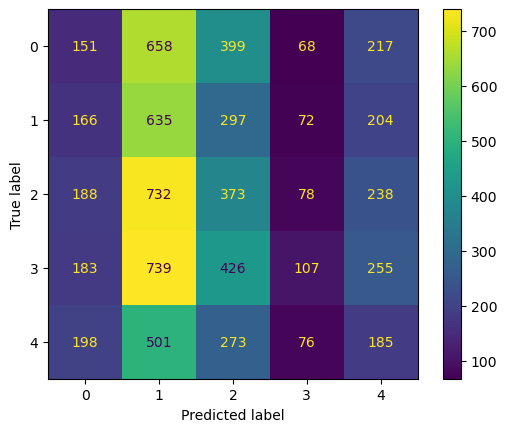

In [34]:
# Lists for evaluation metrics
multi_model = []
multi_accuracy = []

for model in models:
    model_name = model.__class__.__name__

    model.fit(multi_X_train, multi_y_train)                 # train the algorithm on the training data
    model_pred = model.predict(multi_X_test)                # predict labels

    cm = confusion_matrix(multi_y_test, model_pred, labels=model.classes_)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Mapping of scorer name to scorer function
    accuracy = round(metrics.accuracy_score(multi_y_test, model_pred), 3)

    # Append results to corresponding lists
    multi_model.append(model_name)
    multi_accuracy.append(accuracy)

    print("\nThe Metrics for {} are: ".format(model_name))

    print('\nAccuracy: {} \n'.format(accuracy))

    print(classification_report(multi_y_test, model_pred))
    print(cm)
    cm_display.plot()
    plt.show()

    print("==========================================================================================================")

### Compilation of Multi-class Classification Results

In [35]:
# Convert lists to a single DataFrame
multi_dict_of_lists = {"Multi_Model": multi_model, "Multi_Accuracy": multi_accuracy}
multi_all_results = pd.DataFrame(multi_dict_of_lists)

multi_all_results

,Multi_Model,Multi_Accuracy
0,DecisionTreeClassifier,0.754
1,RandomForestClassifier,0.655
2,KNeighborsClassifier,0.394
3,LogisticRegression,0.244
4,LinearSVC,0.196


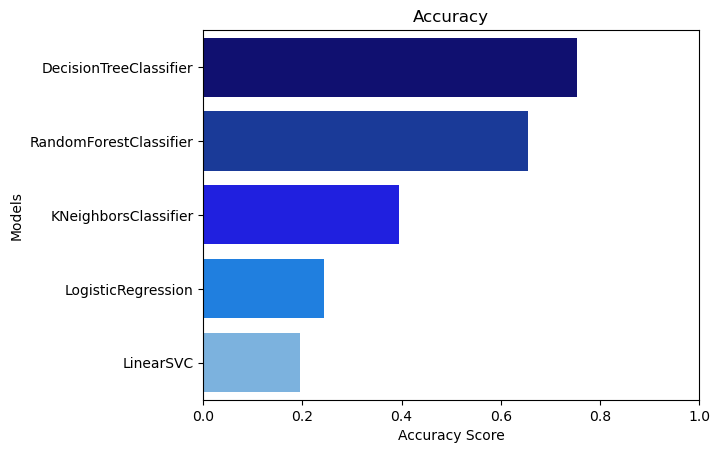

In [36]:
# Multi-class classification accuracy

sns.barplot(x=multi_accuracy, y=multi_model, palette=custom_palette1)
plt.title("Accuracy")
plt.xlabel("Accuracy Score")
plt.ylabel("Models")
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()

## Comparison of Accuracies for Binary and Multi-class Classification

In [37]:
bin_and_multi_lists = {
    "Bin_Model": bin_model,
    "Bin_Accuracy": bin_accuracy,
    "Multi_Accuracy": multi_accuracy,
}
all_accuracies = pd.DataFrame(bin_and_multi_lists)
all_accuracies

,Bin_Model,Bin_Accuracy,Multi_Accuracy
0,DecisionTreeClassifier,0.879,0.754
1,RandomForestClassifier,0.870,0.655
2,KNeighborsClassifier,0.802,0.394
3,LogisticRegression,0.797,0.244
4,LinearSVC,0.738,0.196


In [38]:
all_accuracies_long = all_accuracies.melt(id_vars=["Bin_Model"],
                                          value_vars=['Bin_Accuracy','Multi_Accuracy'],
                                          var_name=['Accuracy_Type'], value_name='value')
all_accuracies_long

,Bin_Model,Accuracy_Type,value
0,DecisionTreeClassifier,Bin_Accuracy,0.879
1,RandomForestClassifier,Bin_Accuracy,0.870
2,KNeighborsClassifier,Bin_Accuracy,0.802
3,LogisticRegression,Bin_Accuracy,0.797
4,LinearSVC,Bin_Accuracy,0.738
5,DecisionTreeClassifier,Multi_Accuracy,0.754
6,RandomForestClassifier,Multi_Accuracy,0.655
7,KNeighborsClassifier,Multi_Accuracy,0.394
8,LogisticRegression,Multi_Accuracy,0.244
9,LinearSVC,Multi_Accuracy,0.196


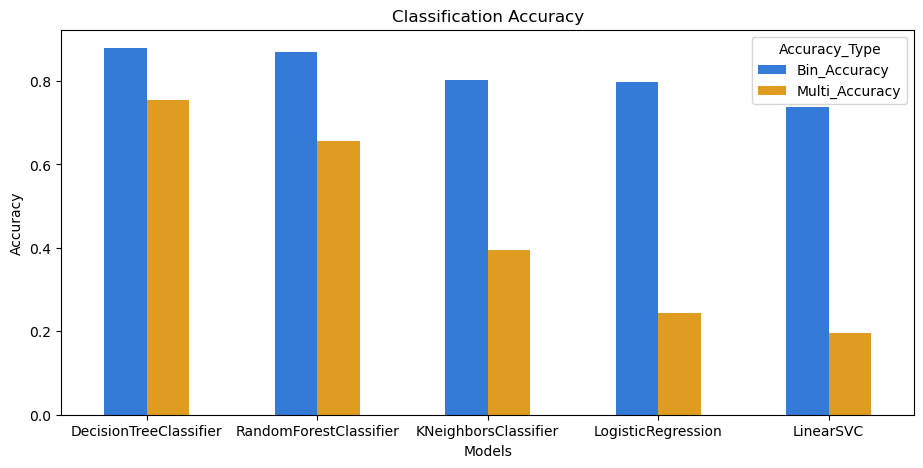

In [39]:
fig = plt.subplots(figsize =(11, 5))

sns.barplot(data=all_accuracies_long, x='Bin_Model', y='value', width=0.5,
            hue='Accuracy_Type', palette=['#1877F2', '#FFA600'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Classification Accuracy")

plt.show()